- title: RDKit 入门：绘制分子图像
- slug: rdkit-draw-molecule
- date: 2022-10-20
- tags: RDKit, Python
- summary: 介绍使用 RDKit 实现分子可视化的基本操作，主要使用了 rdMolDraw2D 模块，其功能包括分子结构的绘制以及在分子结构上添加标记。

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

## 分子可视化

### 绘制单个分子

`Draw.MolToImage(mol, parameters)` 用于绘制分子的图片，可选参数包括：

- `kekulize=True`：是否以凯库勒式表示芳香体系
- `size=(300, 300)`：用像素表示的图片大小
- `wedgeBonds=True`：是否用楔形键表示分子
- `highlightAtoms=[]`：需要高亮表示的原子
- `highlightBonds=[]`：需要高亮表示的化学键
- `highlightColor=[1, 0, 0]`：用 RGB 设定高亮颜色

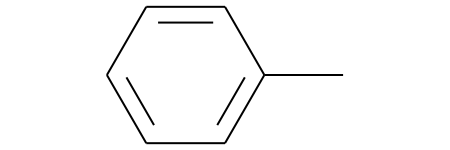

In [2]:
mols = Chem.SDMolSupplier("./mols.sdf")
Draw.MolToImage(mols[0], size=(450, 150))

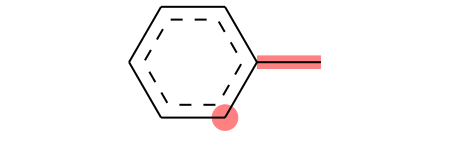

In [3]:
Draw.MolToImage(mols[0], kekulize=False, size=(450, 150),
                highlightAtoms=[2], highlightBonds=[0])

`Draw.MolToFile(mol, filename, parameters)` 具有与之相似的参数，不过 `Draw.MolToFile()` 用于将分子导出为图片文件。

### 绘制多个分子

`Draw.MolsToGridImage(mols, parameters)` 用于同时展示多个分子，其参数如下：

- `molsPerRow=3`：每行分子数目
- `subImgSize=(200, 200)`：每个子图的大小
- `legends=None`：分子的标签，应为列表
- `highlightAtomLists=None`：高亮的原子
- `highlightBondLists=None`：高亮的化学键
- `useSVG=False`：是否转化为 svg 矢量图
- `returnPNG=False`：是否返回 png 图片

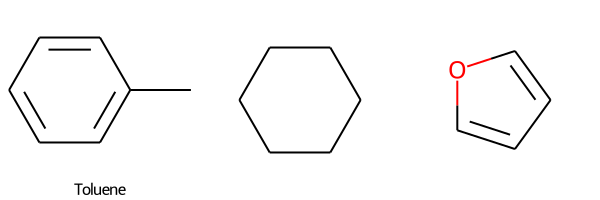

In [4]:
Draw.MolsToGridImage(mols, molsPerRow=3, returnPNG=True,
                     legends=[mol.GetProp("_Name") for mol in mols])

所有图片都可以通过 `img.save(filename)`的方式来保存。

In [5]:
img = Draw.MolToImage(mols[0], size=(200, 200))
img.save("./save_demo.png")

### rdMolDraw2D 模块

`Draw.rdMolDraw2D` 模块提供了更加复杂但功能也更加强大的分子绘制方式。使用`Draw.rdMolDraw2D` 模块绘制分子的步骤可以分为四步，首先需要创建画布，`MolDraw2DSVG()` 用于创建 svg 图片，`MolDraw2DCairo()` 用于创建 png 图片，然后使用 `PrepareAndDrawMolecule()` 在画布上绘图，接着使用 `FinishDrawing()` 结束绘图，最后输出结果。

1. 创建画布：`MolDraw2DSVG()` / `MolDraw2DCairo()`
2. 绘制分子：`PrepareAndDrawMolecule()`
3. 结束绘制：`FinishDrawing()`
4. 输出图片：`WriteDrawingText()`

#### 绘制单个分子

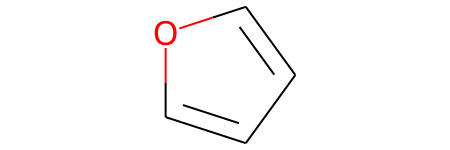

In [6]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import Image


d = rdMolDraw2D.MolDraw2DCairo(450, 150)
rdMolDraw2D.PrepareAndDrawMolecule(d, mols[2])
d.FinishDrawing()
d.WriteDrawingText("./rdMolDraw2D_output_1.png")

Image(filename = "./rdMolDraw2D_output_1.png")

`MolDraw2DSVG(width, height)` / `MolDraw2DCairo(width, height)` 接受的参数决定了图片的大小。

#### 在分子上添加标记

`PrepareAndDrawMolecule(drawer, mol, parameters)` 也可以接受与 `MolToImage()` 类似的参数：

- `legend=''`：分子的标签
- `highlightAtoms`：略
- `highlightBonds`：略
- `highlightAtomColors`：略
- `highlightBondColors`：略
- `highlightAtomRadii`：指定原子高亮的半径
- `confId = -1`：存储分子构象的 Conformer() 类 id
- `kekulize=True`：略

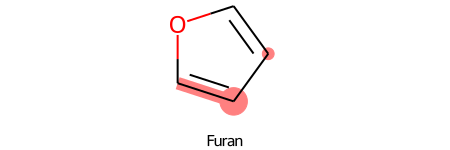

In [7]:
d = rdMolDraw2D.MolDraw2DCairo(450, 150)
rdMolDraw2D.PrepareAndDrawMolecule(d, mols[2], legend='Furan', highlightAtoms=[0, 4],
                                   highlightBonds=[3], highlightAtomRadii={0:0.15, 4:0.35})
d.FinishDrawing()
d.WriteDrawingText("./rdMolDraw2D_output_2.png")

Image(filename = "./rdMolDraw2D_output_2.png")

#### 绘制多个分子

为了避免生成太多的图片文件，这里先额外介绍一下在 Jupyter Notebook 中使用 svg 绘制分子而不导出图片文件的方法。绘制分子步骤没有差异，但是在最后一步中不使用 `WriteDrawingText()` 导出文件，而使用 svg 画布特有的 `GetDrawingText()`。`GetDrawingText()` 直接返回 svg 图片的二进制字符串，使用 `IPython.display` 中的 `SVG` 就能让图片直接显示在输出区了。

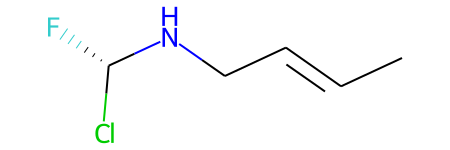

In [8]:
from IPython.display import SVG


mol = Chem.MolFromSmiles('[F][C@@H](Cl)NC/C=C/C')
d = rdMolDraw2D.MolDraw2DSVG(450, 150)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol)
d.FinishDrawing()

SVG(d.GetDrawingText())

除使用 `PrepareAndDrawMolecule()` 绘制分子外，还可以使用 `DrawMolecule(mol)` / `DrawMolecules(mol)` 完成同样的功能，`DrawMolecule()` 用于绘制单个分子，`DrawMolecules()` 用于绘制多个分子。`DrawMolecule(mol)` / `DrawMolecules(mol)` 不需要传入画布参数，因为它们是画布的方法，它们具有与 `PrepareAndDrawMolecule()` 相同的其他参数。

从函数名称还可以看出，`PrepareAndDrawMolecule()` 合并了 Prepare 与 Draw 两个步骤，因此在使用 `DrawMolecule()` / `DrawMolecules()` 绘制分子前，还需要手动完成额外的 Prepare 步骤。

Prepare 步骤是将对分子的预设，例如是否为凯库勒式、是否显示楔形键，应用到分子上，如果没有相应的预设，自然也可以省略 Prepare 步骤。

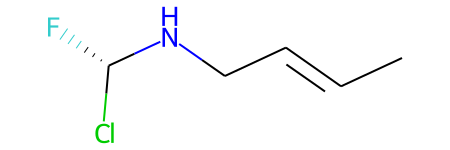

In [9]:
d = rdMolDraw2D.MolDraw2DSVG(450, 150)
mol_prepare = rdMolDraw2D.PrepareMolForDrawing(mol)
d.DrawMolecule(mol_prepare)
d.FinishDrawing()

SVG(d.GetDrawingText())

`MolDraw2DSVG()` / `MolDraw2DCairo()` 除了接受 `width` 与 `height` 参数以外，还接受 `panelWidth` 与 `panelHeigh` 两个参数，这两个参数决定了子图的大小，若子图的尽寸过大，在画布中无法放置下多个分子，分子就会重叠在一起。

PrepareAndDrawMolecule()

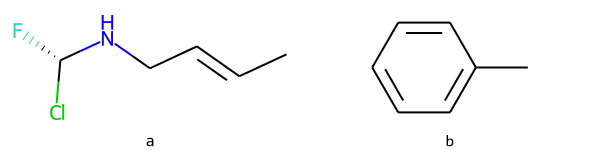

In [10]:
d = rdMolDraw2D.MolDraw2DSVG(600, 150, 300, 150)

d.DrawMolecules([mol, mols[0]], legends=["a", "b"])
d.FinishDrawing()

SVG(d.GetDrawingText())

#### 在分子上添加标记的进阶

原子的 `atomLabel` 特征决定了相应原子的符号，`_displayLabel` 特征决定了原子符号的显示样式，`atomNote` 特征用于在原子上添加字符标记，`bondNote` 用于在化学键上添加标记。

这些特征都支持输入并显示 html 标签 `<sub>` 与 `<sup>`，也是通过这种方法来显示上下标。`_displayLabelW` 用于指定文字自右向左排列，主要用于例如 HOOC-Ar 的情况。`atomLabel` 与 `_displayLabel` 虽然具有相同的效果，但 `atomLabel` 本质上是指定了原子的标签，一般用于指定语义，而不是显示样式。

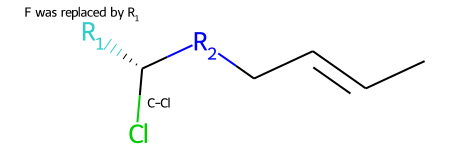

In [11]:
mol.GetAtomWithIdx(0).SetProp("_displayLabel","R<sub>1</sub>")
mol.GetAtomWithIdx(3).SetProp("atomLabel", "R<sub>2</sub>")
mol.GetAtomWithIdx(0).SetProp("atomNote", "F was replaced by R<sub>1</sub>")
mol.GetBondWithIdx(1).SetProp("bondNote", "C-Cl")

d = rdMolDraw2D.MolDraw2DSVG(450, 150)
d.DrawMolecule(mol)
d.FinishDrawing()

SVG(d.GetDrawingText())


对于分子样式的更多样式设置一般通过设置参数器 `drawOptions()` 实现，`drawOptions()` 具有非常多绘图选项，仅列出几个比较常用的选项：

- `addAtomIndices=False`：为原子添加索引标签
- `addBondIndices=False`：为化学键添加索引标签
- `addStereoAnnotation=False`：添加立体构型标签
- `annotationFontScale=0.75`：原子和化学键标记相对于原子符号的大小
- `atomLabelDeuteriumTritium`：将氘和氚分别用 D 和 T 表示
- `baseFontSize=0.6`：字体的相对大小
- `bondLineWidth=-1`：化学键粗细
- `drawMolsSameScale=True`：是否使绘制的多个分子大小相同
- `explicitMethyl=False`：是否显示末端甲基
- `fixedBondLength=-1`：固定键长
- `fixedFontSize=-1`固定字体大小：
- `fixedScale=-1`：固定绘图窗口大小
- `fontFile`：字体文件

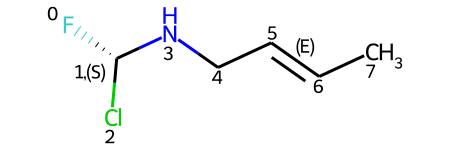

In [12]:
mol = Chem.MolFromSmiles('[F][C@@H](Cl)NC/C=C/C')
d = rdMolDraw2D.MolDraw2DSVG(450, 150)

do = d.drawOptions()
do.addAtomIndices = True
do.addStereoAnnotation = True
do.explicitMethyl = True
do.annotationFontScale = 0.8
do.bondLineWidth = 3

d.DrawMolecule(mol)
d.FinishDrawing()

SVG(d.GetDrawingText())

---

## Reference

- [Getting Started with the RDKit in Python - RDKit](https://www.rdkit.org/docs/GettingStartedInPython.html)
- [@dreadlesss/rdkit_summary - Github](https://github.com/dreadlesss/rdkit_summary)
